CS210 - Introduction to Data Science
Individual Project

In [60]:
#Importing necessery modules
import pandas as pd 
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns  # a visualization library based on matplotlib
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

In [61]:
data=pd.read_csv("taxi-trips.csv") #data that we used 

Task1 

Give basic information regarding the dataset such as shape, data types and descriptive statistics that
summarize columns

In [62]:
data.shape 

#As we can see our data consist of  118185 row and 11 features


(118185, 11)

In [63]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [64]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


Task2 

Create two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding 1 2 to associated coordinates.


In [65]:
#For creating longitude latitude 

a=list(zip(data["pickup_latitude"], data["pickup_longitude"]))

b= list(zip(data["dropoff_latitude"], data["dropoff_longitude"]))

In [66]:
#Applying reverse geocoder
pickup_loc = rg.search(a)
dropoff_loc = rg.search(b)



In [67]:
Pickup_district= []
for i in pickup_loc:
    Pickup_district.append(i["name"])
Dropoff_district= []
for j in dropoff_loc:
    Dropoff_district.append(j["name"])

data['Pickup_district'] = Pickup_district
data['Dropoff_district'] = Dropoff_district
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_district,Dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


In [68]:
#You can see the new column as  Pickup_district and Dropoff_district

Task 3  

Extract the top 5 districts where passengers prefer to leave and arrive.

In [70]:
#For leave

df_top_freq = data.groupby(['Pickup_district']).count().sort_values("vendor_id", ascending=False)
df_top_freq["id"][:5]

Pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: id, dtype: int64

In [33]:
#For leave

In [71]:
df_top_drop = data.groupby(['Dropoff_district']).count().sort_values("id", ascending=False)
df_top_drop["id"][:5]

Dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: id, dtype: int64

Task 4 
Create a new column named ”distance” by utilizing pick up and drop off coordinates 3


In [74]:
#Task4

a=list(zip(data["pickup_latitude"], data["pickup_longitude"]))

b= list(zip(data["dropoff_latitude"], data["dropoff_longitude"]))

import geopy
from geopy.distance import *

distance=[]
for i in range(0,len(a)):
    distance.append(geodesic(a[i],b[i]).miles)
data["Distance"]=distance


In [75]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_district,Dropoff_district,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375


TASK 5 

Create a new column named ”time of day” by aggregating timestamps in ”pickup datetime” into
5 different categories.


In [77]:
#Converting datetitme

data["time_of_day"]=pd.to_datetime(data["pickup_datetime"])
data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"]) # i will use it in later part for finding day of week
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_district,Dropoff_district,Distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,2016-03-14 17:24:55
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,2016-03-10 21:45:01
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,2016-03-11 07:11:23
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,2016-03-14 14:05:39
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,2016-03-14 15:04:38
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,2016-03-12 20:39:39
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,2016-03-02 20:15:07
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,2016-03-09 13:41:11
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,2016-03-03 22:01:32
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,2016-03-14 04:24:36


In [78]:
def aggregate(row):
    hour=row["time_of_day"].hour
    if  hour >= 7  and hour <9:
        row["time_of_day"]="rush hour morning"
    elif hour >=9 and hour <16:
        row["time_of_day"]="afternoon"
    elif hour >=16 and hour < 18:
        row["time_of_day"]="rush hour evening"
    elif hour >=18 and  hour <23:
        row["time_of_day"]="evening"
    else:
        row["time_of_day"]="late_night"
    return row

In [79]:
data=data.apply(aggregate,axis=1)
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_district,Dropoff_district,Distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late_night


Task 6 
• Show how the average distance varies as time of the day changes.

Text(0.5,1,'Bar chart of Distance taken from passengers according to the Time of Day')

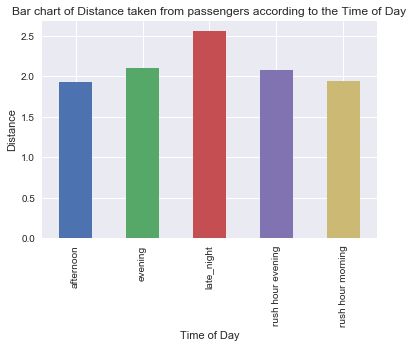

In [80]:

graph=data.groupby('time_of_day')["Distance"].mean()
plotting=graph.plot(kind='bar',legend=None)
plotting.set_xlabel("Time of Day")
plotting.set_ylabel("Distance")
plotting.set_title("Bar chart of Distance taken from passengers according to the Time of Day")


Task 7 
Show how the trip duration varies as time of the day changes.

Text(0.5,1,'Bar chart of Trip duration of passengers according to the Time of Day')

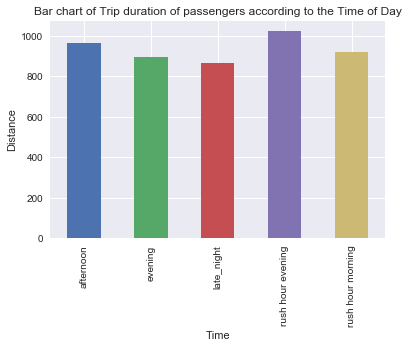

In [84]:
#Task 6 -b 

graph=data.groupby('time_of_day')["trip_duration"].mean()
plotting=graph.plot(kind='bar',legend=None)
plotting.set_xlabel("Time")
plotting.set_ylabel("Distance")
plotting.set_title("Bar chart of Trip duration of passengers according to the Time of Day")




In [85]:
data['week_day'] = data['pickup_datetime'].dt.weekday_name
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_district,Dropoff_district,Distance,time_of_day,week_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,Monday
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening,Saturday
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening,Wednesday
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon,Wednesday
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening,Thursday
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late_night,Monday


In [ ]:
#Hypothesis Testing
#1- Does passenger group size affect the distance?
    

In [88]:
from scipy import stats

sample1 = data[data['passenger_count']<2]['Distance']
sample2 = data[data['passenger_count']>=2]['Distance']
stats.ttest_ind(sample1, sample2, equal_var=False)  # since we have not equal variances
#Reject null hyp

Ttest_indResult(statistic=-4.903706114571113, pvalue=9.428588173218336e-07)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, the test score is negative which indicates that the mean score for passenger count < 2 who completed the course is lower than those greater than and equal  2.

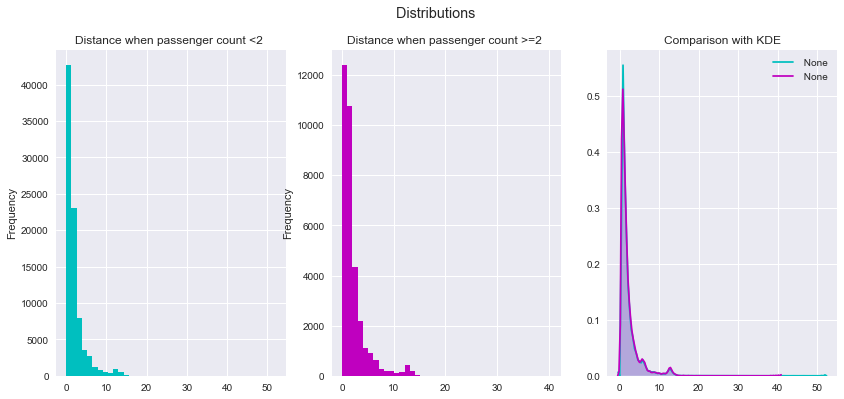

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
sample1.plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("Distance when passenger count <2 ")

sample2.plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("Distance when passenger count >=2 ")

sns.kdeplot(sample1, shade=True, label=" None", ax=ax[2], color="c")
sns.kdeplot(sample2, shade=True, label=" None", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle(" Distributions")
plt.show()

In [ ]:
#2. Do trip distances increase in weekends?

In [91]:
from scipy import stats
s1=data.loc[data["week_day"].isin(['Saturday','Sunday'])]["trip_duration"]
s2=data.loc[data["week_day"].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]["trip_duration"]
stats.ttest_ind(s1, s2, equal_var=False)  # since we have not equal variances
#Reject null hyp

Ttest_indResult(statistic=-2.361713377689828, pvalue=0.018193740149220382)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, the test score is negative which indicates that the mean score for trip duration in weekend  is lower than weekdays.

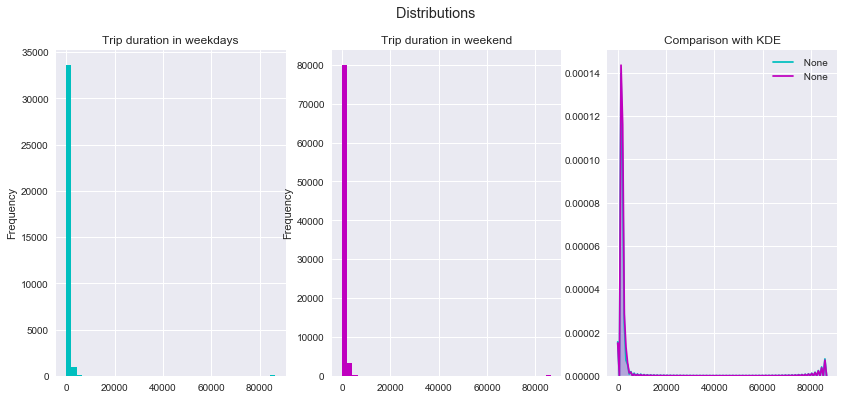

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
s1.plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("Trip duration in weekdays")

s2.plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("Trip duration in weekend")

sns.kdeplot(s1, shade=True, label=" None", ax=ax[2], color="c")
sns.kdeplot(s2, shade=True, label=" None", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle(" Distributions")
plt.show()